## Packages Used in This Notebook

- [NumPy](https://numpy.org/): NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. It provides you with many useful mathematical functions you have seen in Matlab.
- [Matplotlib](https://matplotlib.org/): Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy.
- [Pandas](https://pandas.pydata.org/): pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- [PyTorch](https://pytorch.org/): PyTorch is an open source deep learning library, used for applications such as computer vision and natural language processing, primarily developed by Facebook's AI Research lab (FAIR). We will extensively use PyTorch in this course.
- [Librosa](https://librosa.org/doc/latest/index.html): Librosa is a Python package for music and audio analysis. It provides the building blocks necessary to work with audio files.
- [transformers](https://huggingface.co/transformers/): transformers provides general-purpose architectures (eg., GPT-2) for Natural Language Processing (NLP) and vision models such as ViT (Vision Transformer) in PyTorch.
- [SentencePiece](https://pypi.org/project/sentencepiece/): The SentencePiece library is a software tool that provides a simple and efficient way to tokenize text into subword units, which are smaller than words but larger than individual characters. This approach to text tokenization has become particularly popular in natural language processing (NLP), especially for training and deploying machine learning models like neural machine translation systems and language models.


To install the packages, you can use **conda** or **pip**. **pip** is a package manager for Python that simplifies the process of installing, uninstalling, and managing Python packages. For example, to install NumPy, you can use the following command in your terminal:

- `pip install numpy`
- `conda install numpy`

You can also install the packages directly in the notebook by using the following command:
`!pip install numpy`

The "!" tells the notebook to run the command in the terminal. For example, you can use `!ls` to see the files in the current directory.

In [2]:
# We will be using the following libraries in this workshop

# Numpy is a library for working with Arrays
import numpy as np

# Matplotlib is a library for plotting
import matplotlib.pyplot as plt

# Pandas is a library for data manipulation
import pandas as pd

# IPython.display is a utility for displaying objects within the Jupyter notebook
from IPython.display import display

import warnings

warnings.filterwarnings(action='ignore', category=RuntimeWarning)
warnings.filterwarnings(action='ignore', category=UserWarning)
# The line above is to supress warnings from the solver.
# We will do it just to have a clean output.
# In practice, you should not do this. 

RND_SEED=42


1. **Understanding Data**: We begin with a dataframe containing exam IDs and their corresponding ECG outcomes. 

2. **Preparing Input Data with Speech-to-Text Model**: Our first task involves using features from a speech-to-text (s2t) model encoder by Meta. We'll preprocess these features, focusing on getting mean values to streamline computational demands.

3. **Filtering Ground Truth Values**: Next, we'll dive into our dataframe, referred to as `f_df`. Here, we filter out the ground truth values that correspond to the given exam ID.

4. **Organizing Audio Files**: All our audio files are named following the convention `ecg_audio_examid.mp3`. We'll use a split function to extract the exam ID from these file names.

5. **Matching Audio to Ground Truth**: After retrieving the exam IDs from audio files, we'll match them with their corresponding ground truth labels for the ECG audio.

6. **Creating the Dataset**: Finally, we'll compile our dataset in the format `(X,y)`. `X` represents our input data in a 1D format, and `y` stands for the ground truth labels.


<p align="center">
<img src="data/project.jpg" alt="drawing" width="100%"/>
</p>

## Reading CSV files


For this project we will be only using part of the examination dataset `exams_part0`: https://zenodo.org/records/4916206/files/exams_part0.zip?download=1


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #1.</span>  Read CSV file using pandas library and print the first few rows.

In [3]:
# Give the actual file path for csv
df = pd.read_csv('data/exams.csv')

# Display the first few rows of the dataframe
df.head()

,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
0,1169160,38,True,40.160484,False,False,False,False,False,False,523632,False,2.098628,True,exams_part13.hdf5
1,2873686,73,True,67.059440,False,False,False,False,False,False,1724173,False,6.657529,False,exams_part13.hdf5
2,168405,67,True,79.621740,False,False,False,False,False,True,51421,False,4.282188,False,exams_part13.hdf5
3,271011,41,True,69.750260,False,False,False,False,False,False,1737282,False,4.038353,True,exams_part13.hdf5
4,384368,73,True,78.873460,False,False,False,False,False,False,331652,False,3.786298,False,exams_part13.hdf5


In [4]:
# We will be only using exams_part0
# Let's extract the records related to exams_part0
# We can do that using trace_file property

# Filter rows where 'trace_file' is equal to 'exams_part0'
f_df = df[df['trace_file'] == 'exams_part0.hdf5']

# Display the filtered DataFrame
f_df


,exam_id,age,is_male,nn_predicted_age,1dAVb,RBBB,LBBB,SB,ST,AF,patient_id,death,timey,normal_ecg,trace_file
352,3158243,59,False,64.235565,False,False,False,False,False,False,1280570,NaN,NaN,False,exams_part0.hdf5
353,1126697,63,False,67.575520,False,False,False,False,False,False,223781,False,2.178080,True,exams_part0.hdf5
354,91288,49,False,55.587772,False,False,False,False,False,False,1546425,NaN,NaN,False,exams_part0.hdf5
355,2660251,42,False,48.175446,False,False,False,False,False,False,160919,False,7.243830,False,exams_part0.hdf5
356,4390974,42,True,47.617800,False,False,False,False,False,False,98649,NaN,NaN,False,exams_part0.hdf5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344091,1133183,46,False,61.897950,False,False,False,False,False,False,161647,NaN,NaN,True,exams_part0.hdf5
344092,531004,71,True,78.271890,False,False,False,False,False,False,110931,NaN,NaN,False,exams_part0.hdf5
344093,1439610,37,False,37.154194,False,False,False,False,False,False,231567,False,1.545204,True,exams_part0.hdf5
344094,3096455,74,True,76.501396,False,False,False,False,False,False,611873,False,6.589036,False,exams_part0.hdf5


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #2.</span> Now plot ECG Distributions using pandas mapping function and matplotlib.

C:\Users\deanm\AppData\Local\Temp\ipykernel_18408\3714563907.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_df['normal'] = f_df['normal_ecg'].map({True: 'Normal', False: 'Abnormal'})


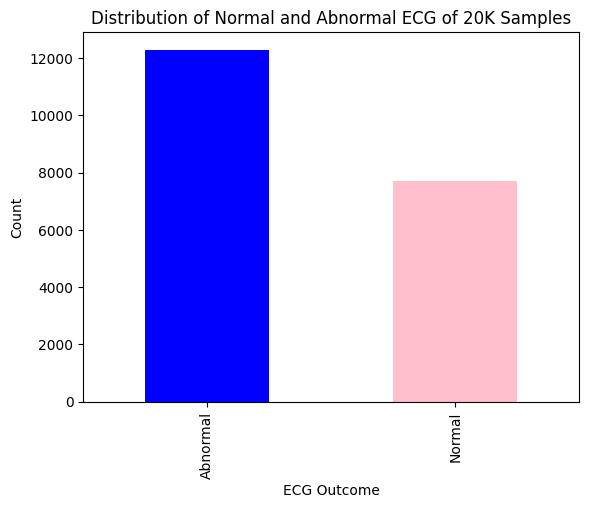

In [5]:
# 'normal' column contains True and False
# Map True to 'Normal' and False to 'Abnormal'
f_df['normal'] = f_df['normal_ecg'].map({True: 'Normal', False: 'Abnormal'})

# Count the occurrences 
distribution = f_df['normal'].value_counts()

# Plot the distribution using a bar plot
distribution.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Normal and Abnormal ECG of 20K Samples')
plt.xlabel('ECG Outcome')
plt.ylabel('Count')
plt.show()

In the zip file, you've got a HDF5 file (exams_part0.hdf5) alongwith the CSV file. The HDF5 file containing two datasets named `tracings` and other named `exam_id`. The `exam_id` is a tensor of dimension `(N,)` containing the exam id (the same as in the csv file) and the dataset `tracings` is a `(N, 4096, 12)` tensor containing the ECG tracings in the same order. The first dimension corresponds to the different exams; the second dimension corresponds to the 4096 signal samples; the third dimension to the 12 different leads of the ECG exams in the following order: `{DI, DII, DIII, AVR, AVL, AVF, V1, V2, V3, V4, V5, V6}`. The signals are sampled at 400 Hz. Some signals originally have a duration of 10 seconds (10 * 400 = 4000 samples) and others of 7 seconds (7 * 400 = 2800 samples). 

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #3.</span> Print the content of HDF5 file.

In [6]:
import h5py

# Specify the path to your HDF5 file
file_path = 'data/exams_part0/exams_part0.hdf5'

# Explore the contents of the HDF5 file
def print_hdf5_item(name, obj):
    print(name, obj)

with h5py.File(file_path, 'r') as file:
    file.visititems(print_hdf5_item)

exam_id <HDF5 dataset "exam_id": shape (20001,), type "<i8">
tracings <HDF5 dataset "tracings": shape (20001, 4096, 12), type "<f4">


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #4.</span> Save the first tracing out of 12 as an audio (mp3 or wav format).

In [7]:
from scipy.io.wavfile import write
from sklearn.preprocessing import MinMaxScaler

# Step 1: Load a segment of ECG data
file_path = 'data/exams_part0/exams_part0.hdf5'

with h5py.File(file_path, 'r') as file:
    # Assuming you want to extract the first tracing of the first lead
    ecg_data = file['tracings'][0, :, 0]

# Step 2: Normalize or scale the ECG data for audio conversion 
# Hint: You can use sklearn preprocessing e.g., MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))
ecg_data = ecg_data.reshape(-1,1)
ecg_data_normalized  = scaler.fit_transform(ecg_data)

# Step 3: Convert to mp3 format and save
sample_rate = 400  # You might need to adjust this based on your requirements
write('data/ecg_audio.mp3', sample_rate, ecg_data_normalized)

## Working with audio

An audio file is a sequence of values recorded over time. In technical terms, it is a time-series data. If you were to open an MP3 file with a text editor, you would see a series of characters. These characters correspond to the raw audio samples that constitute the time-series data. To properly read and play an audio file, we need to understand some formatting details, but let's not worry about that for now. The crucial parameter we need is the sample rate (SR), which denotes the number of samples per second. For example, if the SR is 44100, then there are 44100 samples per second. Higher SR values generally indicate better audio quality. 

The [Librosa](https://librosa.org/doc/latest/index.html) library offers a diverse set of functionalities for reading, analyzing, and manipulating audio data. Utilizing Librosa, we can load audio files in various formats, including MP3 or WAV.

First, install Librosa and then study the code below.


In [8]:
# Librosa is a library for audio analysis
# https://librosa.org/doc/latest/index.html
# with this library we can load audio files, extract features, and perform analysis
import librosa
from IPython.display import Audio

# Path to the MP3 file
audio_file = "data/ecg_audio.mp3"

# Load the audio file
audio, sr = librosa.load(audio_file, sr=None)

# Display the audio player
Audio(audio_file)

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #5.</span>  Now take 2000 samples from the audio and plot it using matplotlib.

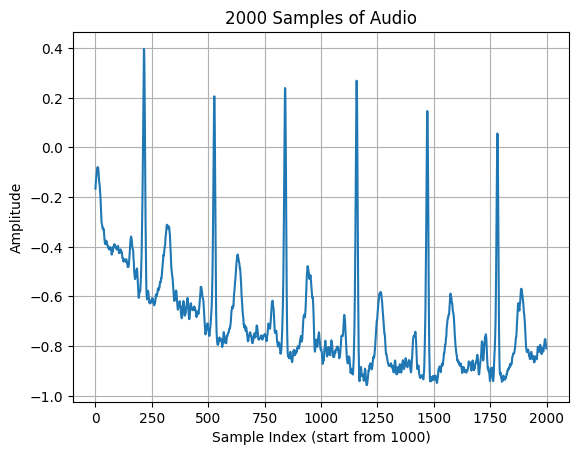

In [9]:
# Take 2000 samples from the audio file
start_idx = 1000
num_samples = 2000
audio_samples = audio[start_idx:start_idx+num_samples]

# Create the plot
plt.plot(audio_samples)
plt.xlabel(f"Sample Index (start from {start_idx})")
plt.ylabel("Amplitude")
plt.title(f"{num_samples} Samples of Audio")
plt.grid(True)

# Show the plot
plt.show()

## Extracting Features Using an existing model

Now let's see how to extract features of the saved ECG audio from an existing audio model.

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #6.</span> What will you get if you feed an ECG audio file to an existing audio model?

---

Have you ever wondered what would happen if you fed an ECG audio to a Speech-to-text audio model? Can it effectively recognize and interpret the rhythmic beats as a heartbeat?

---

We are using the `s2t-small-librispeech-asr` model by Meta for this task. s2t-small-librispeech-asr is a Speech to Text Transformer (S2T) model trained for automatic speech recognition (ASR). The S2T model is an end-to-end sequence-to-sequence transformer model.

Click on the provided link to examine the results for the ECG audio you stored during inference:`https://huggingface.co/facebook/s2t-small-librispeech-asr`


In [10]:
# Import necessary libraries
import torch
import torchaudio
from transformers import Speech2TextProcessor, Speech2TextForConditionalGeneration

# Load the pre-trained Speech2Text model and processor from Hugging Face Transformers
model = Speech2TextForConditionalGeneration.from_pretrained("facebook/s2t-small-librispeech-asr")
processor = Speech2TextProcessor.from_pretrained("facebook/s2t-small-librispeech-asr")

# Set up a resampler to adjust the audio sampling rate
resampler = torchaudio.transforms.Resample(400, 16_000)

# Define a function to preprocess the datasets
# This function reads the audio files and converts them into arrays
def speech_file_to_array_fn(path):
    # Load the audio file using torchaudio
    speech_array, sampling_rate = torchaudio.load(path)
    # Resample the audio file and convert it to a numpy array
    speech_array = resampler(speech_array).squeeze().numpy()
    
    return speech_array

# Load and preprocess the audio file
speech_array = speech_file_to_array_fn('data/ecg_audio.mp3')

# Prepare the model input
# Process the audio array and convert it to model compatible format
inputs = processor(speech_array, sampling_rate=16000, return_tensors="pt", padding=True)

# Generate IDs for the input features
generated_ids = model.generate(input_features=inputs.input_features)

# Decode the generated IDs to get the transcription
transcription = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

# Print the transcription of the audio file
print(transcription)

Some weights of Speech2TextForConditionalGeneration were not initialized from the model checkpoint at facebook/s2t-small-librispeech-asr and are newly initialized: ['model.decoder.embed_positions.weights', 'model.encoder.embed_positions.weights']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ad viviscent vendevis vin


We introduce a custom class, `CustomSpeech2TextModel`, derived from the `Speech2TextForConditionalGeneration` model. This custom model is tailored to extract and output the last layer encoder features from an audio input. These features represent a more complex and enriched understanding of the audio signal compared to the mere textual transcription.

In [11]:
# Define a custom class inheriting from Speech2TextForConditionalGeneration
class CustomSpeech2TextModel(Speech2TextForConditionalGeneration):
    # Override the forward method to customize the model's behavior
    def forward(self, input_features, **kwargs):
        # Run the forward pass up to the encoder using the input features
        # This will process the input through the model's encoder
        encoder_outputs = self.model.encoder(input_features=input_features, return_dict=True)
        
        # Extract the features from the encoder's last layer
        # These features represent the encoded representation of the input
        last_encoder_features = encoder_outputs.last_hidden_state

        # Return the last layer's features from the encoder
        return last_encoder_features

# Initialize the custom model with the pre-trained weights
# This creates an instance of our custom model using a pre-trained base
model_encoder = CustomSpeech2TextModel.from_pretrained("facebook/s2t-small-librispeech-asr")

Some weights of CustomSpeech2TextModel were not initialized from the model checkpoint at facebook/s2t-small-librispeech-asr and are newly initialized: ['model.decoder.embed_positions.weights', 'model.encoder.embed_positions.weights']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Now, let's get audio features from a speech-to-text (s2t) model and proceed to train a Multi-Layer Perceptron (MLP) classifier to detect whether ECG reading is normal or abnormal.

Our initial step involves a conversion process, where we'll transform HDF5 files into audio files. Previously, we worked on a smaller scale, converting a single file and focusing on just one out of several leads. Now, we're scaling up our efforts. The task at hand is to create audio files for 100 unique IDs, forming a dataset substantial enough for effective model training. Keep in mind, our dataset contains over 20,000 IDs. However, due to computational complexity we will be using only 100 IDs.

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #7.</span> Create audio files for the first 100 exam IDs

In [12]:
file_path = 'data/exams_part0/exams_part0.hdf5'
sample_size = 100

with h5py.File(file_path, 'r') as file:
    # Assuming you want to extract the first tracing of the first lead
    ecg = file['tracings'][:sample_size, :, 0]
    all_ecg_data = np.array(ecg)
    all_exam_ids = np.array(file['exam_id'][:sample_size])
    print(all_ecg_data.shape)
    print(all_exam_ids.shape)

for i in range(all_ecg_data.shape[0]):
    ecg_data = all_ecg_data[i].reshape(-1,1)
    scaler = MinMaxScaler(feature_range=(-1,1))
    ecg_data = ecg_data.reshape(-1,1)
    ecg_data_normalized  = scaler.fit_transform(ecg_data)

    sample_rate = 400  
    write(f'data/audio_files/ecg_audio_{all_exam_ids[i]}.mp3', sample_rate, ecg_data_normalized)

(100, 4096)
(100,)


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #8.</span> Create the dataset to train MLP Classifier

We're working with a dataset that consists of exam IDs and their related ECG outcomes, alongside corresponding audio files. To create an effective dataset, we follow these steps:

1. **Input Data Processing**: We start by utilizing the features extracted from a speech-to-text (s2t) model encoder. These features are preprocessed, mainly by calculating their mean values, which helps in reducing computational complexity.

2. **Filtering Ground Truth Values**: In our dataframe, named `f_df`, we identify and extract the ground truth values that match each exam ID. This step is crucial for accurate data labeling.

3. **Organizing Audio Files**: Our audio files are stored following the naming pattern `ecg_audio_examid.mp3`. To link these files with their respective exam IDs, we'll employ a split function. This allows us to extract the exam ID from each audio file name.

4. **Matching Audio to Ground Truth**: After identifying the exam IDs from the audio files, we align them with the corresponding ground truth labels of the ECG audio. This step is essential for creating a dataset that pairs each input with its correct label.

5. **Dataset Formation**: The final step involves compiling the data into a structured dataset. This dataset will be in the format `(X, y)`, where `X` represents the input data in a one-dimensional format, and `y` stands for the ground truth labels.

By following these steps, we can efficiently create a dataset that is both organized and ready for model training.

In [13]:
import os
from tqdm import tqdm

# Define a function to extract features from audio files
def extract_features(data_dir, audio_paths):
    dataset = []  # To store the extracted features and labels
    exam_ids = []  # To store the exam IDs
    count = 0  # Initialize a counter to keep track of processed files

    # Iterate through the list of audio files with a progress bar
    for audio_file_name in tqdm(audio_paths, desc="Processing audio files"):
        # Extract the exam ID from the audio file name
        exam_id = audio_file_name.split("ecg_audio_")[1].split(".mp3")[0]

        # Process only a certain number of audio files (up to sample_size)
        if count < sample_size:
            # Check if the extracted exam ID matches with the file name
            if str(exam_id) in audio_file_name:
                # Get the ground truth label for the audio file from the dataframe
                ground_truth = f_df.loc[f_df['exam_id'] == int(exam_id), 'normal_ecg'].values
                exam_ids.append(int(exam_id))

                # Check if the ground truth value exists
                if len(ground_truth):
                    Y = ground_truth[0]  # The label (normal or abnormal ECG)

                    # Convert the audio file to a tensor using a defined function
                    audio = speech_file_to_array_fn(os.path.join(data_dir, audio_file_name))

                    # Process the audio tensor with the processor
                    inputs = processor(audio, sampling_rate=16000, return_tensors="pt", padding=True)

                    # Extract features using the model encoder
                    audio_features = model_encoder(input_features=inputs.input_features)

                    # Aggregate the features and pair with the label
                    data = (torch.mean(audio_features.reshape(-1, 256), dim=0), int(Y))

                    # Append the (features, label) pair to the dataset
                    dataset.append(data)
                    count += 1  # Increment the counter

    return dataset, exam_ids  # Return the dataset and list of exam IDs

# Define the path to the directory containing audio files
data_path = "data/audio_files"

# List all files in the data directory
audio_paths = os.listdir(data_path)

# Call the function to extract features and get the dataset and exam IDs
dataset_list, exam_ids = extract_features(data_path, audio_paths)

Processing audio files:   0%|          | 0/100 [00:00<?, ?it/s]

Processing audio files: 100%|██████████| 100/100 [00:20<00:00,  4.97it/s]


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #9.</span> Plot the distribution of 100 Exam IDs

Now let's see the distribution of ECG outcomes from `f_df` for 100 exam_ids that we are using to train our MLP Classifier. 

Note: We can use that `f_df` dataframe to retrieve ECG outcomes corresponding to `exam_ids` we have.

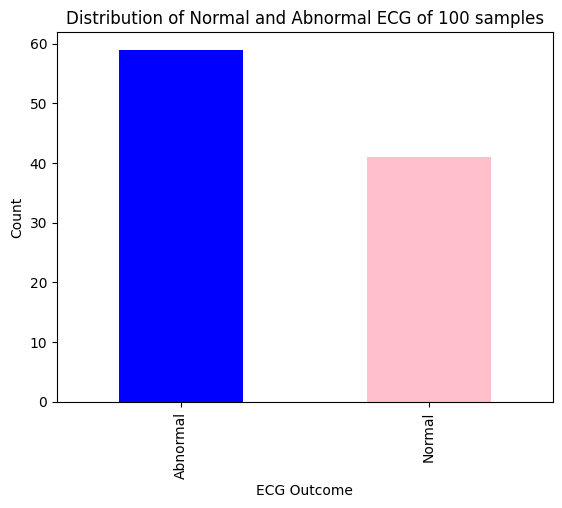

In [14]:
# Filter the DataFrame to get the normal_ecg values for these exam IDs
# Resulting filtered df should contain both exam_id & normal_ecg
filtered_df = f_df.loc[f_df['exam_id'].isin(exam_ids), ['exam_id','normal_ecg']]

# 'normal' column contains True and False
# Map True to 'Normal' and False to 'Abnormal'
filtered_df['normal'] = filtered_df['normal_ecg'].map({True: 'Normal', False: 'Abnormal'})

# Count the occurrences o
distribution = filtered_df['normal'].value_counts()

# Plot the distribution using a bar plot
distribution.plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Normal and Abnormal ECG of 100 samples')
plt.xlabel('ECG Outcome')
plt.ylabel('Count')
plt.show()

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #10.</span> Create dataset in X and y form and save as npz file

Transform a list of dataset components into separate tensors for features and labels, and display their dimensions. Then save dataset as npz.

In [15]:
# Now we have a dataset with labeled ECG audio files (X: features, y: labels)
# Extract individual components of the dataset list into features and labels
features_list, labels_list = zip(*dataset_list)

# Convert lists to tensors
features_tensor = torch.stack(features_list, dim=0)
labels_tensor = torch.tensor(labels_list)

# Print the resulting tensors
print("Features Tensor Shape:", features_tensor.shape)
print("Labels Tensor Shape:", labels_tensor.shape)

# Convert the extracted lists into tensors
X = torch.stack(features_list, dim=0)
y = torch.tensor(labels_list)

# Convert tensors to numpy arrays for compatibility with scikit-learn
X = X.detach().numpy()
y = y.detach().numpy()

# Save the arrays X and y into a single .npz file
np.savez('data/dataset.npz', X=X, y=y)

Features Tensor Shape: torch.Size([100, 256])
Labels Tensor Shape: torch.Size([100])


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #11.</span> Train Logistic Regression Model

Create and assess a Logistic Regression Model using a dataset of labeled ECG audio file features.

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = np.load('data/dataset.npz')
X = data['X']
y = data['y']

# Split the dataset into training and testing sets with a test size of 20%
# RND_SEED is a predefined random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND_SEED)

# Initialize an LogisticRegression model with specific parameters
regression_model = LogisticRegression(max_iter=10000, verbose=10, random_state=RND_SEED)

# Train the model with the training data
regression_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
y_pred = regression_model.predict(X_test)

# Evaluate the model's performance using accuracy as the metric
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.6


[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done   1 tasks      | elapsed:    0.0s


<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #12.</span> Train MLP Classifier

Create and assess a MLP classifier using a dataset of labeled ECG audio file features.

In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

data = np.load('data/dataset.npz')
X = data['X']
y = data['y']

# Split the dataset into training and testing sets with a test size of 20%
# RND_SEED is a predefined random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RND_SEED)

# Initialize an MLPClassifier with specific parameters
classifier = MLPClassifier(hidden_layer_sizes=(100), activation='logistic', max_iter=10000, verbose=10, random_state=RND_SEED, solver='adam', tol=0.000000001)

# Train the classifier with the training data
classifier.fit(X_train, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = classifier.predict(X_test)

# Evaluate the classifier's performance using accuracy as the metric
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Iteration 1, loss = 0.67239896
Iteration 2, loss = 0.67162525
Iteration 3, loss = 0.67063494
Iteration 4, loss = 0.66976378
Iteration 5, loss = 0.66896380
Iteration 6, loss = 0.66808468
Iteration 7, loss = 0.66719453
Iteration 8, loss = 0.66635694
Iteration 9, loss = 0.66553847
Iteration 10, loss = 0.66469165
Iteration 11, loss = 0.66382841
Iteration 12, loss = 0.66298049
Iteration 13, loss = 0.66214973
Iteration 14, loss = 0.66131288
Iteration 15, loss = 0.66045790
Iteration 16, loss = 0.65959404
Iteration 17, loss = 0.65873332
Iteration 18, loss = 0.65787485
Iteration 19, loss = 0.65700914
Iteration 20, loss = 0.65613057
Iteration 21, loss = 0.65524202
Iteration 22, loss = 0.65434856
Iteration 23, loss = 0.65345073
Iteration 24, loss = 0.65254427
Iteration 25, loss = 0.65162569
Iteration 26, loss = 0.65069495
Iteration 27, loss = 0.64975440
Iteration 28, loss = 0.64880543
Iteration 29, loss = 0.64784726
Iteration 30, loss = 0.64687826
Iteration 31, loss = 0.64589757
Iteration 32, los

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #13.</span> Evaluate the performance of a trained classifier.


Plot the loss convergence of the MLP Classifier, Calculate its accuracy, Area Under the Curve (AUC) score, and generate a detailed classification report including metrics like precision and recall.

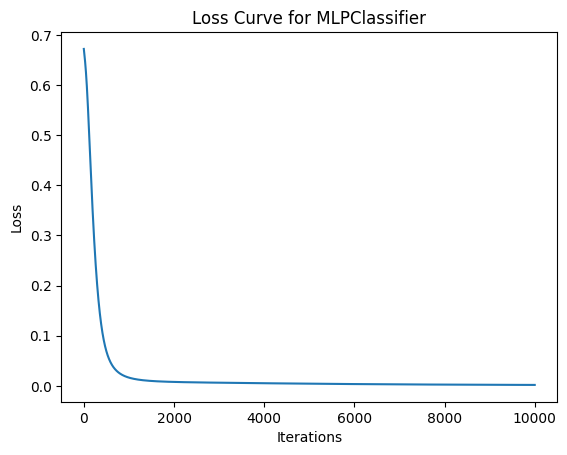

In [17]:
# Plot the loss curve
plt.plot(classifier.loss_curve_)
plt.title('Loss Curve for MLPClassifier')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

In [18]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_auc_score

# calculate the accuracy
acc = accuracy_score(y_test, y_pred)
#calculate the AUC score
auc = round(roc_auc_score(y_test, y_pred),2)
#classification report provides all metrics e.g. precision, recall, etc. 
all_met = classification_report(y_test, y_pred)

# Print the accuracy
print("Accuracy: ", acc*100, "%")
print("\n")
print("AUC:", auc)
print("\n")
print("Classification Report: \n", all_met)
print("\n")

Accuracy:  80.0 %


AUC: 0.8


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.78      0.78      0.78         9

    accuracy                           0.80        20
   macro avg       0.80      0.80      0.80        20
weighted avg       0.80      0.80      0.80        20





<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #14.</span> Display Confusion Matrix

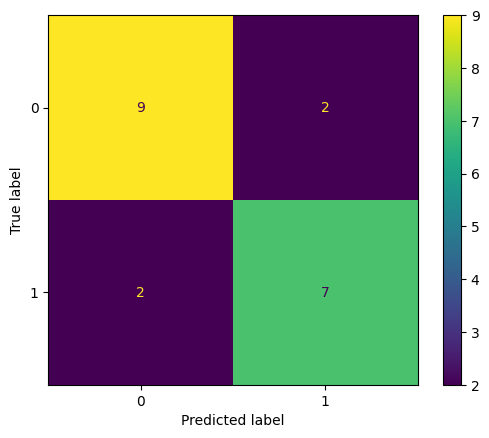

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

<div style="background-color: #3352FF; color: white; padding: 10px; border-radius: 5px;">

### <span style="color: pink;">Part #15.</span> Display Receiver Operating Characteristic (ROC) Curve

Generate and analyze the ROC curve to assess the performance of a classification model, focusing on the trade-off between sensitivity and specificity.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


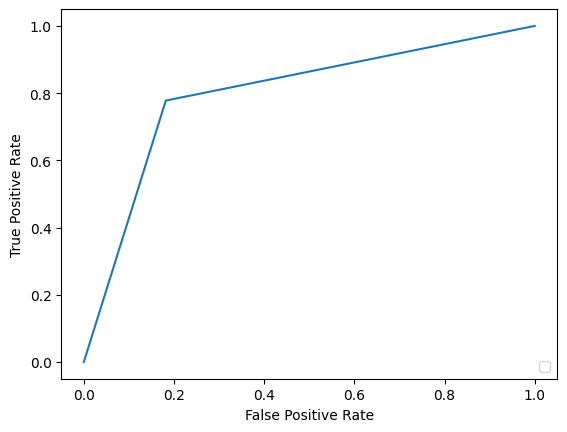

In [20]:
from sklearn.metrics import RocCurveDisplay, roc_curve


fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=classifier.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()